In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
import pandas as pd

# Sample dataset with age and glucose level
data = {
    'age': [18, 22, 25, 28, 32, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
    'glucose': [75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display dataset
print(df)


    age  glucose
0    18       75
1    22       80
2    25       85
3    28       90
4    32       95
5    35      100
6    40      110
7    45      120
8    50      130
9    55      140
10   60      150
11   65      160
12   70      170
13   75      180
14   80      190


In [3]:
# Define the threshold for high glucose (126 mg/dL)
df['high_glucose'] = df['glucose'].apply(lambda x: 1 if x >= 126 else 0)

# Display updated dataset
print(df)

    age  glucose  high_glucose
0    18       75             0
1    22       80             0
2    25       85             0
3    28       90             0
4    32       95             0
5    35      100             0
6    40      110             0
7    45      120             0
8    50      130             1
9    55      140             1
10   60      150             1
11   65      160             1
12   70      170             1
13   75      180             1
14   80      190             1


In [4]:
# Define predictor (X) and target variable (y)
X = df[['age']]  # Predictor variable
y = df['high_glucose']  # Target variable
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and testing sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

# Display training and testing sets
print("\nTraining Data:\n", X_train.join(y_train))
print("\nTesting Data:\n", X_test.join(y_test))

Training set: (12, 1), (12,)
Testing set: (3, 1), (3,)

Training Data:
     age  high_glucose
13   75             1
5    35             0
8    50             1
2    25             0
1    22             0
14   80             1
4    32             0
7    45             0
10   60             1
12   70             1
3    28             0
6    40             0

Testing Data:
     age  high_glucose
9    55             1
11   65             1
0    18             0


In [5]:
model=LogisticRegression()
model.fit(X_train,y_train)
print("intercept:",model.intercept_)
print("coefficient:",model.coef_[0])

intercept: [-34.47396139]
coefficient: [0.72541493]


In [6]:
import matplotlib.pyplot as plt 
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/home/it22a17/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


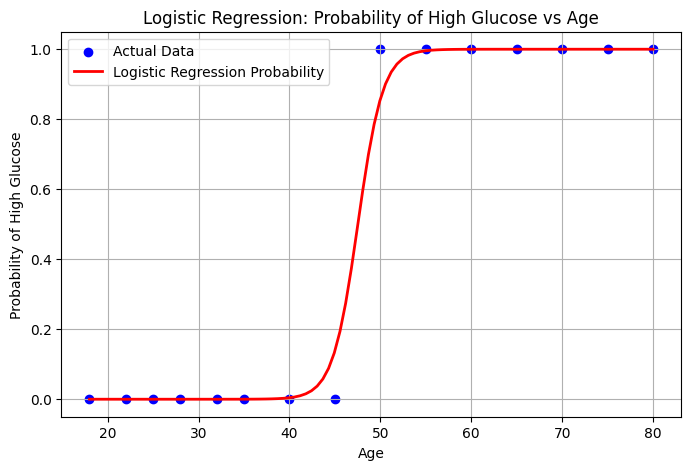

In [7]:
# Generate age values for probability curve
age_range = np.linspace(df['age'].min(), df['age'].max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(age_range)[:, 1]  # Probability of high glucose (1)

# Plot Probability Curve
plt.figure(figsize=(8, 5))
plt.scatter(df['age'], df['high_glucose'], color='blue', label='Actual Data')
plt.plot(age_range, probabilities, color='red', linewidth=2, label='Logistic Regression Probability')

# Labels and Title
plt.xlabel("Age")
plt.ylabel("Probability of High Glucose")
plt.title("Logistic Regression: Probability of High Glucose vs Age")
plt.legend()
plt.grid(True)
plt.show()